In [110]:
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(1, os.sep.join(["..", "packages"]))
from fractional_brownian_motion import *
from alphastable import *

In [148]:
M1 = -100
M2 = 100

H = 0.3
alpha = 2

I = 10000
tau = (M2 - M1) / I
S = M1 + np.arange(0, I + 1) * tau

cut_point_1 = np.where(S > 0)[0][0] # changing sign
S_negative = S[:cut_point_1 - 1]
max_S_neg = np.maximum((-S_negative) ** (H - 1 / alpha), 0)

dt = 0.01
T = np.arange(0, dt * 999, dt)

N_trajectories = 1

def f(S, t, cut_point_1, S_negative, max_S_neg):
    cut_point_2 = np.where(S > t)[0][0] # less than t
    S_positive = S[cut_point_1 - 1:cut_point_2 - 1]
    return np.concatenate(
            ((t - S_negative) ** (H - 1 / alpha) - max_S_neg,
            (t - S_positive) ** (H - 1 / alpha))
        )

M = np.ones((N_trajectories, len(T)))

for i in range(N_trajectories):
    Z = alphastable(len(S), 1, alpha = alpha, beta = 0, gamma = tau ** (1 / alpha), delta = 0, k = 1)
    for j, t in enumerate(T):
        F = f(S, t, cut_point_1, S_negative, max_S_neg)
        M[i, j] = F @ Z[:len(F)]

In [134]:
np.shape(M[0, :])

(999,)

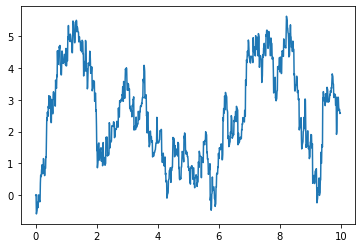

In [149]:
plt.plot(T, M[0, :])

In [8]:
X = np.random.normal(0, 1, 10)
X

array([ 2.22962358,  1.91564161, -0.99789995, -1.09695015,  0.43273982,
        0.6184473 ,  0.61459722,  0.21481862, -0.51091412, -0.1039131 ])

In [9]:
np.maximum(X, 0)

array([2.22962358, 1.91564161, 0.        , 0.        , 0.43273982,
       0.6184473 , 0.61459722, 0.21481862, 0.        , 0.        ])